In [1]:
import psutil
import os

# Verificar el uso de CPU del proceso actual
cpu_usage = psutil.Process(os.getpid()).cpu_percent(interval=1)
print(f"Uso de CPU: {cpu_usage}%")



Uso de CPU: 0.4%


# Problema 1

In [3]:
import cv2
import numpy as np

def activar_canales(imagen, color):
    #COPIAS DE LA ORIGINAL
    nueva_imagen = np.zeros_like(imagen)
    
    # Activar canales de color según el valor de `color`
    if color == 1:
        nueva_imagen[:, :, 0] = imagen[:, :, 0]  # Azul
    elif color == 2:
        nueva_imagen[:, :, 1] = imagen[:, :, 1]  # Verde
    elif color == 3:
        nueva_imagen[:, :, 2] = imagen[:, :, 2]  # Rojo
    elif color == 10:
        nueva_imagen[:, :, 1] = imagen[:, :, 1]  # Verde
        nueva_imagen[:, :, 2] = imagen[:, :, 2]  # Rojo
    elif color == 20:
        nueva_imagen[:, :, 0] = imagen[:, :, 0]  # Azul
        nueva_imagen[:, :, 1] = imagen[:, :, 1]  # Verde
    elif color == 30:
        nueva_imagen[:, :, 0] = imagen[:, :, 0]  # Azul
        nueva_imagen[:, :, 2] = imagen[:, :, 2]  # Rojo

    return nueva_imagen

# EJEMPLO
imagen = cv2.imread('landscape.jpg')

imagen_resultante = activar_canales(imagen, 1)

cv2.imshow('Imagen Resultante', imagen_resultante)
cv2.waitKey(5000)
cv2.destroyAllWindows()

# Problema 2

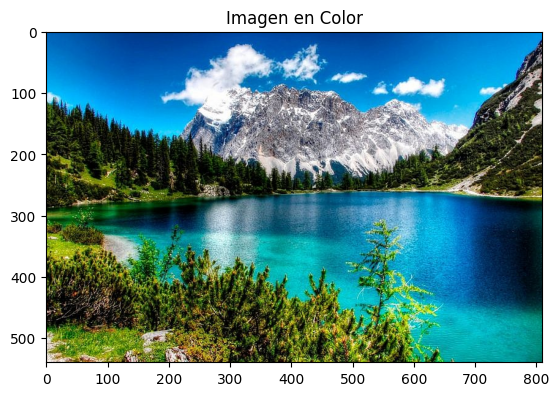

In [5]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def construir_imagen_color(imagen1, imagen2, imagen3):
    # Asegurarse de que todas las imágenes tengan las mismas dimensiones
    height, width = imagen1.shape[:2]
    imagen2 = cv2.resize(imagen2, (width, height))
    imagen3 = cv2.resize(imagen3, (width, height))
    
    # Crear una imagen en color vacía con las mismas dimensiones que las imágenes en escala de grises
    imagen_color = np.zeros((height, width, 3), dtype=np.uint8)
    
    # Asignar cada imagen en escala de grises a un canal de color
    imagen_color[:, :, 0] = imagen1  # Canal azul
    imagen_color[:, :, 1] = imagen2  # Canal verde
    imagen_color[:, :, 2] = imagen3  # Canal rojo
    
    return imagen_color

# Cargar las imágenes en escala de grises
imagen1 = cv2.imread('imagen1_salida_gray_azul.jpg', cv2.IMREAD_GRAYSCALE)
imagen2 = cv2.imread('imagen1_salida_gray_verde.jpg', cv2.IMREAD_GRAYSCALE)
imagen3 = cv2.imread('imagen1_salida_gray_rojo.jpg', cv2.IMREAD_GRAYSCALE)

# Verificar que las imágenes se hayan cargado correctamente
if imagen1 is not None and imagen2 is not None and imagen3 is not None:
    # Construir la imagen en color
    imagen_color = construir_imagen_color(imagen1, imagen2, imagen3)

    # Mostrar la imagen en color
    plt.imshow(cv2.cvtColor(imagen_color, cv2.COLOR_BGR2RGB))
    plt.title('Imagen en Color')
    plt.show()
else:
    print("Error al cargar las imágenes.")




# PROBLEMA 3

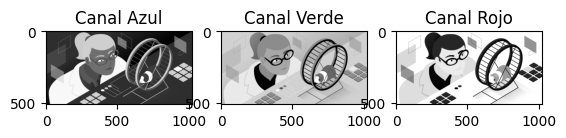

In [7]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def separar_canales(imagen_color):
    # Separeacion de colores
    canal_azul, canal_verde, canal_rojo = cv2.split(imagen_color)
    
    return canal_azul, canal_verde, canal_rojo

ruta_imagen = 'test.png'
imagen_color = cv2.imread(ruta_imagen)

# Verificaion
if imagen_color is not None:
    # Separar los canales de color
    canal_azul, canal_verde, canal_rojo = separar_canales(imagen_color)

    # escala de grises para cada canal
    plt.subplot(1, 3, 1)
    plt.imshow(canal_azul, cmap='gray')
    plt.title('Canal Azul')

    plt.subplot(1, 3, 2)
    plt.imshow(canal_verde, cmap='gray')
    plt.title('Canal Verde')

    plt.subplot(1, 3, 3)
    plt.imshow(canal_rojo, cmap='gray')
    plt.title('Canal Rojo')

    plt.show()

#Guardar las imagenes.
    cv2.imwrite('canal_azul.jpg', canal_azul)
    cv2.imwrite('canal_verde.jpg', canal_verde)
    cv2.imwrite('canal_rojo.jpg', canal_rojo)
else:
    print("Error al cargar la imagen.")


# PROBLEMA 4}

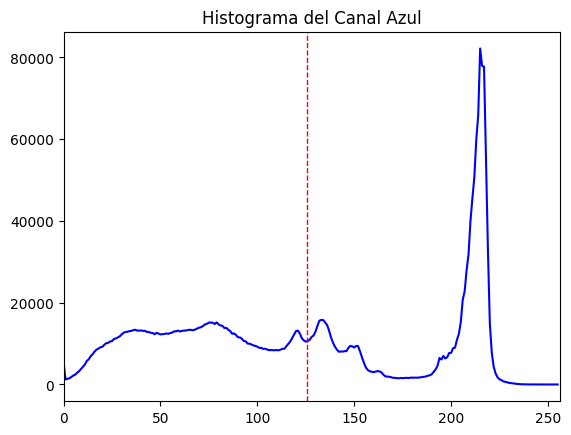

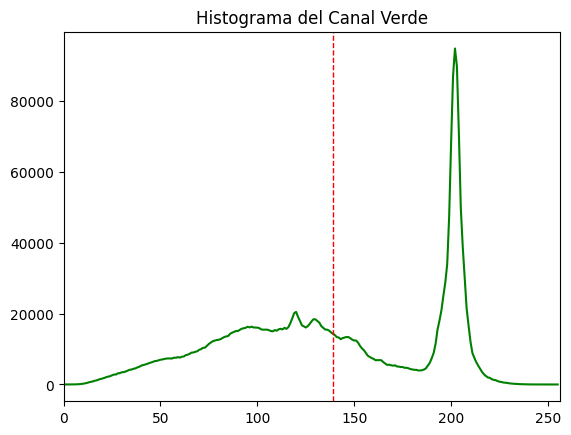

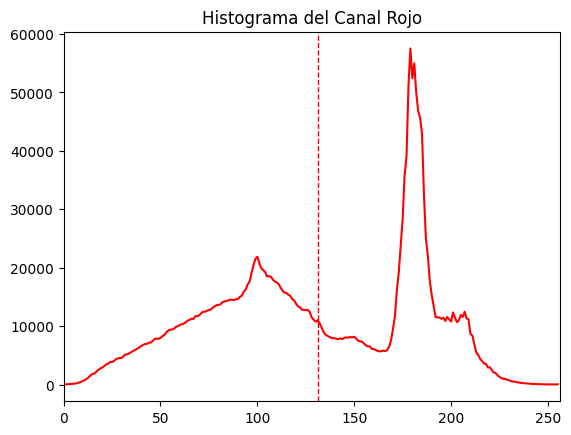

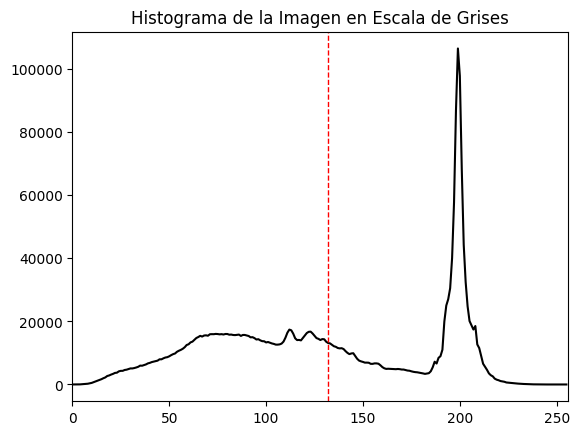

In [9]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def calcular_histograma(imagen, titulo, color='k'):
    # calculo de hisotgrama
    hist, bins = np.histogram(imagen.flatten(), 256, [0, 256])
    media = np.mean(imagen)
    
    plt.plot(hist, color=color)
    plt.axvline(x=media, color='r', linestyle='dashed', linewidth=1)
    plt.title(titulo)
    plt.xlim([0, 256])
    plt.show()

def mostrar_histogramas(imagen_color):
    # Separacion de canal
    canal_azul, canal_verde, canal_rojo = cv2.split(imagen_color)
    imagen_gris = (canal_azul.astype(np.float32) + canal_verde.astype(np.float32) + canal_rojo.astype(np.float32)) / 3
    imagen_gris = imagen_gris.astype(np.uint8)
    
    # Canales de Color
    calcular_histograma(canal_azul, 'Histograma del Canal Azul', 'b')
    calcular_histograma(canal_verde, 'Histograma del Canal Verde', 'g')
    calcular_histograma(canal_rojo, 'Histograma del Canal Rojo', 'r')
    # Esscala de grises
    calcular_histograma(imagen_gris, 'Histograma de la Imagen en Escala de Grises')

#imagen a analizar.
ruta_imagen = 'landscape.jpg'
imagen_color = cv2.imread(ruta_imagen)

# Verificador
if imagen_color is not None:
    mostrar_histogramas(imagen_color)
else:
    print("Error al cargar la imagen.")
